In [1]:
#경고 끄기
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

%matplotlib inline
plt.rc('font', family='Malgun Gothic')

In [3]:
df = pd.read_csv("1001.csv")

In [10]:
new_df = pd.concat((df[['kgperprice','yyyy','mm']].groupby(['yyyy','mm']).mean(), df.groupby(['yyyy','mm'])[['totalprice','totalweight']].sum()), axis=1)

In [11]:
new_df.to_csv('mean_of_month_1.csv')

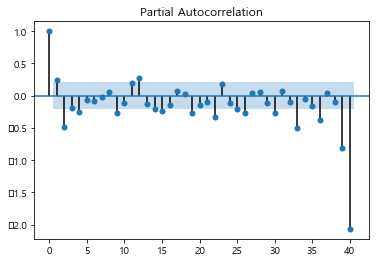

In [12]:
x_t  = new_df['kgperprice'][1:]
x_t1 = new_df['kgperprice'][:-1]
y = np.log(x_t.values / x_t1.values)
sm.graphics.tsa.plot_pacf(y, lags=40)
plt.show()

In [13]:
x_t1 = pd.Series(x_t1.values)
x_t = pd.Series(x_t.values)
x_t1.corr(x_t)

0.67425685164842

In [14]:
df2 = df.groupby(['yyyy','mm'])[['kgperprice','totalprice','totalweight']].mean()

In [15]:
df2.to_csv('mean_of_month_1.csv')